In [1]:
import pandas as pd
import sql_module as s
import ml_module as ml
import matplotlib.pyplot as plt

In [2]:
file_path = 'autos.csv'
df = ml.load_data(file_path)

In [3]:
name_data = 'data'
cursor = s.create_base(name_data)

In [4]:
table_name = 'cars'
columns = {'brand': 'TEXT',
           'model': 'TEXT',
           'yearOfRegistration': "INT",
           'price': 'INT'}
s.create_table(cursor, table_name, columns)

Таблица cars успешно создана


In [5]:
s.insert_in_table(df, cursor, table_name, columns)

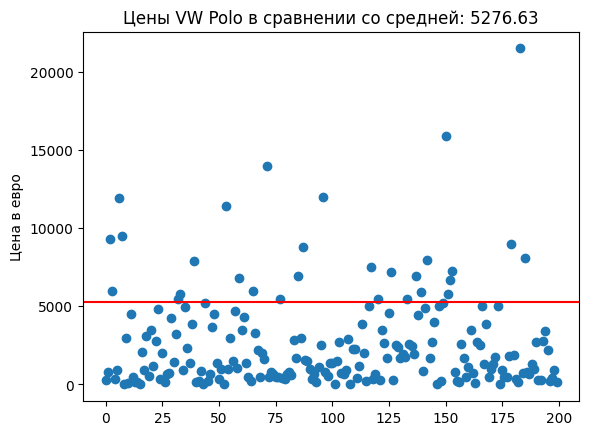

In [28]:
cursor.execute('''SELECT price FROM cars
                  WHERE brand = 'volkswagen' AND model = 'polo'
                  LIMIT 200
                ''')
prices_VWPolo = cursor.fetchall()
cursor.execute('''SELECT AVG(price) FROM cars
                  WHERE brand = 'volkswagen' AND model = "polo"''')
avg_price_polo = cursor.fetchone()
plt.title(f"Цены VW Polo в сравнении со средней: {avg_price_polo[0]:.6}")
plt.ylabel("Цена в евро")
plt.scatter([i for i in range(len(prices_VWPolo))], prices_VWPolo, )
plt.axhline(avg_price_polo[0], 0, len(prices_VWPolo) + 1, color = 'r')
plt.show()
